# Code for the Example in Sect 3

In [1]:
import numpy as np

In [2]:
data = np.loadtxt('Clusters_W1.dat')
data.shape

(10745, 5)

In [3]:
data

array([[ 34.8023 ,  -7.01005,   0.3    ,   4.435  ,  10.     ],
       [ 34.9425 ,  -7.38996,   0.5    ,   4.545  ,  21.     ],
       [ 34.8651 ,  -6.69449,   0.5    ,   3.858  ,   6.     ],
       ..., 
       [ 38.1521 ,  -3.8871 ,   1.     ,   4.489  ,  23.     ],
       [ 38.1083 ,  -4.15283,   0.9    ,   5.017  ,  22.     ],
       [ 38.1083 ,  -3.78745,   1.     ,   4.353  ,  23.     ]])

In [4]:
redshift = data[:,2]
sig = data[:,3]
richness = data[:,4]

In [5]:
#select the highest significance, low-z clusters
here = (sig > 15) & (redshift < 0.5)
sig[here].shape

(15,)

In [6]:
z = redshift[here]
n200 = richness[here]

## Optional Plotting of $z$ and $N_{200}$

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
% matplotlib inline

In [8]:
minbin = z.min()-0.05
maxbin = z.max()+0.05
n_edges = (z.max()-z.min())*10 + 2

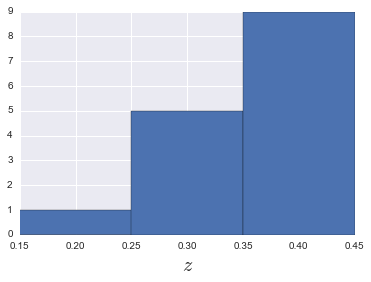

In [9]:
plt.hist(z, bins=np.linspace(minbin, maxbin, n_edges))
plt.xlabel('$z$', fontsize=20)
plt.show()
plt.savefig('zhist.png')

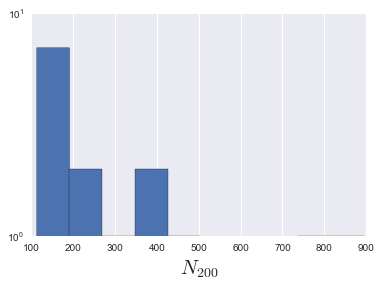

In [10]:
plt.hist(n200)
plt.yscale('log')
plt.xlabel('$N_{200}$', fontsize=20)
plt.show()
plt.savefig('nhist.png')

# Generate properties and profiles

In [11]:
import clusterlensing

In [12]:
c = clusterlensing.ClusterEnsemble(z)
c.n200 = n200

In [13]:
c.dataframe.head()

,z,n200,m200,r200,c200,delta_c,rs
0,0.4,181,5.897552e+14,1.531367,3.966101,5173.016417,0.386114
1,0.3,420,1.916332e+15,2.357815,3.658237,4332.615805,0.644522
2,0.4,176,5.670737e+14,1.511478,3.980218,5213.746469,0.379747
3,0.3,113,3.049521e+14,1.277703,4.341779,6324.420397,0.294281
4,0.4,162,5.049435e+14,1.454129,4.022285,5336.272412,0.361518


In [14]:
rbins = np.logspace(np.log10(0.1), np.log10(10.0), num = 20)
c.calc_nfw(rbins)

In [15]:
ordered = c.n200.argsort()[::-1] # from high to low richness

In [16]:
# strings for plots
raxis = '$R\ [\mathrm{Mpc}]$'
sgma = '$\Sigma(R)$'
sgmaoff = '$\Sigma^\mathrm{off}(R)$'
delta = '$\Delta$'
sgmaunits = ' $[M_{\odot} / \mathrm{pc}^2]$'

In [17]:
import matplotlib
matplotlib.rcParams['axes.labelsize']=20
matplotlib.rcParams['legend.fontsize']=20

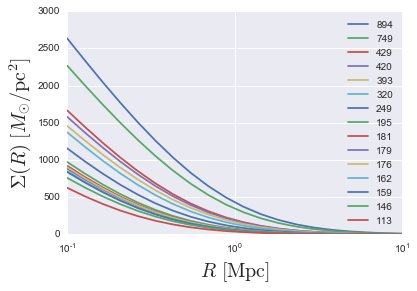

In [18]:
for profile, rich in zip(c.sigma_nfw[ordered], c.n200[ordered]):
    plt.plot(rbins, profile, label=str(int(rich)))
plt.xscale('log')
plt.legend(fontsize=10)
plt.ylabel(sgma+sgmaunits)
plt.xlabel(raxis)

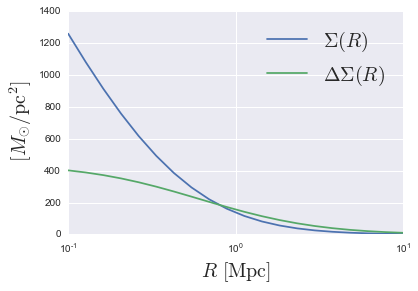

In [19]:
sigma = c.sigma_nfw.mean(axis=0)
dsigma = c.deltasigma_nfw.mean(axis=0)

plt.plot(rbins, sigma, label=sgma)
plt.plot(rbins, dsigma, label=delta+sgma)
plt.legend()

plt.ylim([0.,1400.])
plt.xscale('log')
plt.xlabel(raxis)
plt.ylabel(sgmaunits)

In [20]:
offsets = np.ones(c.z.shape[0]) * 0.1
c.calc_nfw(rbins, offsets=offsets)

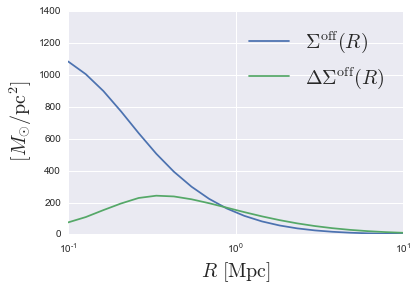

In [21]:
sigma_offset = c.sigma_nfw.mean(axis=0)
dsigma_offset = c.deltasigma_nfw.mean(axis=0)

plt.plot(rbins, sigma_offset, label=sgmaoff)
plt.plot(rbins, dsigma_offset, label=delta+sgmaoff)
plt.legend()

plt.ylim([0.,1400.])
plt.xscale('log')
plt.xlabel(raxis)
plt.ylabel(sgmaunits)

# Different masses... is this interesting?
Suppose a new mass estimate has been done, suggesting that masses are 20% higher across the board.

In [22]:
c.dataframe.head()

,z,n200,m200,r200,c200,delta_c,rs
0,0.4,181,5.897552e+14,1.531367,3.966101,5173.016417,0.386114
1,0.3,420,1.916332e+15,2.357815,3.658237,4332.615805,0.644522
2,0.4,176,5.670737e+14,1.511478,3.980218,5213.746469,0.379747
3,0.3,113,3.049521e+14,1.277703,4.341779,6324.420397,0.294281
4,0.4,162,5.049435e+14,1.454129,4.022285,5336.272412,0.361518


In [23]:
c.m200 = c.m200 * 1.2
c.dataframe.head()

,z,n200,m200,r200,c200,delta_c,rs
0,0.4,206.175287,7.077062e+14,1.627320,3.901126,4988.061708,0.417141
1,0.3,478.417793,2.299599e+15,2.505553,3.596600,4175.157911,0.696645
2,0.4,200.479837,6.804884e+14,1.606185,3.915012,5027.243872,0.410263
3,0.3,128.717168,3.659425e+14,1.357762,4.268625,6089.074554,0.318080
4,0.4,184.532577,6.059322e+14,1.545242,3.956389,5145.110093,0.390569


In [24]:
c.calc_nfw(rbins, offsets=offsets)

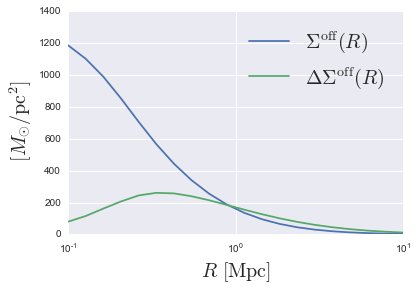

In [25]:
sigma_offset = c.sigma_nfw.mean(axis=0)
dsigma_offset = c.deltasigma_nfw.mean(axis=0)

plt.plot(rbins, sigma_offset, label=sgmaoff)
plt.plot(rbins, dsigma_offset, label=delta+sgmaoff)
plt.legend()

plt.ylim([0.,1400.])
plt.xscale('log')
plt.xlabel(raxis)
plt.ylabel(sgmaunits)